<div style="background-color:#5F9EA0; 
            color:white; 
            padding:15px; 
            border-radius:10px; 
            text-align:center; 
            font-size:30px; 
            font-weight:bold;">
    Emotion Recognition in Human Faces<br>
    <span style="font-size:20px; font-weight:normal;">
        Group 7: Oliver Hutton, Aada Koivuniemi, Laura Jonker
    </span>
</div>

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b> 

<h1 id="setup" 
    style="font-size:30px;
           background-color:#D2EFF1;
           color:#5F9EA0;
           font-weight:bold;
           padding:10px;
           border-radius:10px;">
    Introduction
</h1>


The ability to recognise facial expressions plays an important role in daily life, as it is one of many nonverbal cues that helps us navigate social situations. However, attributing emotional states to other people is not always straightforward; Mollahosseini et al. (2017) demonstrated that two people who observe the same facial expressions might perceive an emotion completely differently. In this study, two annotators were presented with pictures of faces and were told to categorise them into one of eleven emotions, but they only agreed 60.7% of the time. An overview for the agreement on the emotions of interest for the current competition is provided below: 

| Disgust | Anger | Happy | Sad |
| --- | --- | --- | --- |
| 67.6% | 62.3% | 79.6% | 69.7% |

These proportions are an indication of the *Bayes error bound*, the theoretical lower bound of misclassification probability. They are, however, rather low. This could be explained by personality and environmental factors, and brain differences (Lander & Bindemann, 2021). Therefore, we were interested in whether Machine Learning algorithms could perform better than humans. 

We will use a range of modelling techniques, from less flexible, such as Linear Discriminant Analysis (LDA) and Classification and Regression Trees (CART), to more flexible, such as Random Forests (RF), Random Vector Machines (RVM), and Boosted Trees. We will look at a variety of features, such as **mean**, **standard deviation**, **range**, and **entropy**, which are computed over **segments of the images**. We also compute the **symmetry** of the images, as well as **deep features**. Since the data is high-dimensional, we believe the less flexible models might be too simplistic, and the more flexible ones will outperform them. This can also be seen in previous research; a review by Rehman et al. (2025) found that Support Vector Machines (SVM) and RF performed better than CART on facial emotion recognition using the CK+ database.

 </div>

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    1. Setup Notebook
</h1


In [1]:
## Clear list
rm(list = ls())

## Importing packages
suppressMessages(library(tidyverse)) # metapackage with lots of helpful functions
library(png) # package that can be used to read png image files in a simple format
library(entropy) # to compute the entropy feature
library(keras) 

## Reading in files
list.files(path = "../input/")

suppressMessages(library(caret))

[1] "bda-2025-human-faces"

In [2]:
## Availabe directories
dirs <- dir("../input", pattern = "[^g]$", 
            recursive = TRUE, 
            include.dirs = TRUE, 
            full.names = TRUE)
dirs

[1] "../input/bda-2025-human-faces"                     
[2] "../input/bda-2025-human-faces/ckplus"              
[3] "../input/bda-2025-human-faces/ckplus/test"         
[4] "../input/bda-2025-human-faces/ckplus/train"        
[5] "../input/bda-2025-human-faces/ckplus/train/anger"  
[6] "../input/bda-2025-human-faces/ckplus/train/disgust"
[7] "../input/bda-2025-human-faces/ckplus/train/happy"  
[8] "../input/bda-2025-human-faces/ckplus/train/sadness"

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    2. Read Data
</h1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

The data for this competition, which consists of images (48 x 48 pixels) of faces expressing one of four emotions, was derived from the CK+ database, specifically the 'cropped' database (images display just faces; the background is cropped out). Some of the images are shifted or slightly rotated, with the purpose of increasing the difficulty of classification, and generalizability of the model. 

The data consists of several images from 101 different individuals. Emotion labeling was carried out by emotion researchers (Lucey, et al., 2010). The age of participants ranged from 18 to 50 years. The proportions of the ethnicities of participants was as follows: 81%, Euro-American, 13% Afro-American, and 6% other groups. Lastly, 69% of participants were female (Lucey, et al., 2010; p. 1). Participants were instructed to display different emotions, of these were our emotions of interest: sadness, happiness, disgust, and anger.

Note that the model is thus specifically trained to recognize *only* those four emotions, and might perform better on white, female faces. Moreover, the facial expressions were elicited in an artificial setting (laboratory), and it is therefore unclear whether the displayed expressions differ from real-life expressions. The model was trained on greyscale images, so it may not be applicable to colour image data. </div>

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    2.1 Emotions
</h2

In [3]:
## Get image files and assign to correct emotion
anger <- dir(grep("anger", dirs, value = TRUE), 
             pattern = "png$", full.names = TRUE)
disgust <- dir(grep("disgust", dirs, value = TRUE), 
               pattern = "png$", full.names = TRUE)
happy <- dir(grep("happy", dirs, value = TRUE), 
             pattern = "png$", full.names = TRUE)
sad <- dir(grep("sad", dirs, value = TRUE), 
           pattern = "png$", full.names = TRUE)
test_im <- dir(grep("test", dirs, value = TRUE), 
               pattern = "png$", full.names = TRUE)

str(anger)
str(disgust)
str(happy)
str(sad)
str(test_im)

 chr [1:570] "../input/bda-2025-human-faces/ckplus/train/anger/S010_004_00000018a.png" ...


 chr [1:744] "../input/bda-2025-human-faces/ckplus/train/disgust/S005_001_00000009a.png" ...


 chr [1:870] "../input/bda-2025-human-faces/ckplus/train/happy/S010_006_00000013a.png" ...


 chr [1:354] "../input/bda-2025-human-faces/ckplus/train/sadness/S011_002_00000020a.png" ...


 chr [1:1080] "../input/bda-2025-human-faces/ckplus/test/S010_004_00000017a.png" ...


<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    2.2 Images
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

We read in the training and test data, and check whether this was done correctly.

</div>

In [4]:
# Combine all filenames into a single vector
train_image_files <- c(anger, happy, sad, disgust)

# Read in the images as pixel values (discarding color channels)
X <- sapply(train_image_files, function(nm) c(readPNG(nm)[,,1])) |> t()

# Create labels for the training images
y <- c(rep("anger", length(anger)),
      rep("happy", length(happy)),
      rep("sad", length(sad)),
      rep("disgust", length(disgust)))

# Process test images in the same way as the training images
X_test <- sapply(test_im, function(nm) c(readPNG(nm)[,,1])) |> t()

# Change row and column names of X to something more manageable 
rownames(X) <- gsub(".+train/", "", rownames(X))
rownames(X_test) <- gsub(".+test/",  "", rownames(X_test))

# Assign column names for X and X_test
colnames(X) <- paste("p", 1:ncol(X), sep = "")
colnames(X_test) <- paste("p", 1:ncol(X_test), sep = "")

# Check the result
X[1:6, 20:23] |> print()
table(y)
dim(X)

                                    p20        p21        p22        p23
anger/S010_004_00000018a.png 0.58039216 0.60784314 0.70196078 0.85882353
anger/S010_004_00000018b.png 0.02745098 0.02745098 0.04313725 0.07450980
anger/S010_004_00000018c.png 0.03529412 0.03137255 0.02745098 0.01960784
anger/S010_004_00000018d.png 0.03921569 0.03137255 0.03137255 0.02745098
anger/S010_004_00000018e.png 1.00000000 1.00000000 1.00000000 1.00000000
anger/S010_004_00000018f.png 1.00000000 1.00000000 1.00000000 1.00000000


y
  anger disgust   happy     sad 
    570     744     870     354 

[1] 2538 2304

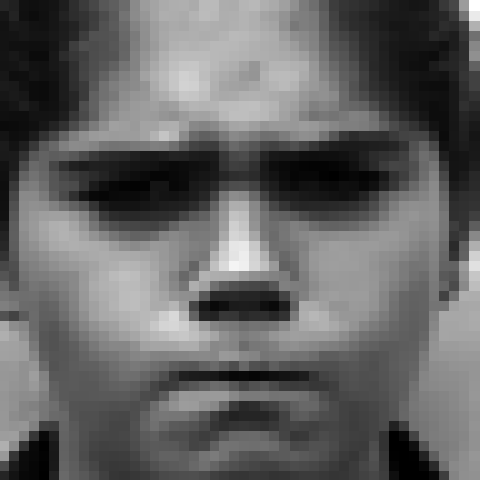

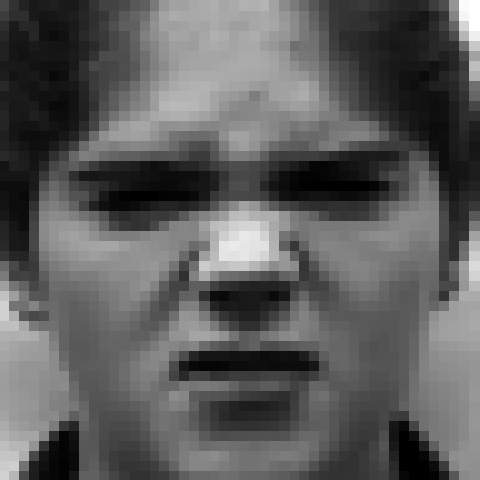

In [5]:
## Inspect dataframe 
# Visualization utility function
as_image <- function(x, nr = sqrt(length(x))) {
    opar = par(mar = rep(0,4))
    on.exit(par(opar))
    image(t(matrix(x,nr))[,nr:1], 
          col = gray(0:255/255),axes = F)
}

# Visualize
options(repr.plot.width = 4, repr.plot.height = 4)

as_image(X[13,])
as_image(X_test[13,])

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    2.3 Creating training and validation sets
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

In the data, there are 6 images of the same face with the same expression; the difference between them is that each one is either slightly shifted or tilted. If the same face is split between the training and validation set (say, 4 in training and 2 in validation), our model might be trained on recognising patterns that are specific to those faces, leading to overfitting. To account for this, we group each face together, and then create the training/ validation sets. 

</div>

In [6]:
# Separate training vs validation set, but group same faces together - the same face is presented 6 times
# So if we randomly split them into two sets, the algorithm might just recognise the face rather than the emotion
get_person_id <- function(path) {
    basename(path) %>%
    strsplit("_") %>%
    sapply(function(x) x[1])
}

# All image paths
train_paths <- c(anger, happy, sad, disgust)

# Get person ID for each image
person_ids <- get_person_id(train_paths)



In [7]:
## Create training and validation set based on unique person id
set.seed(2023)
unique_ids <- unique(person_ids)
n_val_ids <- floor(length(unique_ids) * 0.2)

# Randomly sample person IDs for validation
val_ids <- sample(unique_ids, n_val_ids)
is_valid <- person_ids %in% val_ids

# Apply to data
X_train <- X[!is_valid, ]
y_train <- y[!is_valid]

xvalid <- X[is_valid, ]
yvalid <- y[is_valid]

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   3. Data Exploration
</h1

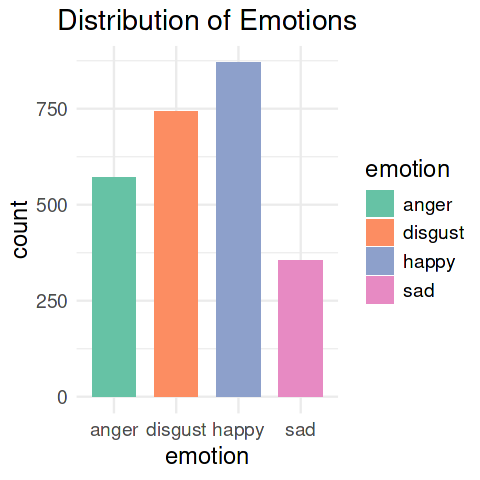

In [8]:
## Distribution of emotions in dataset
data.frame(emotion = y) |>
    group_by(emotion) |>
    summarize(count = n()) |>
ggplot(aes(x = emotion, y = count, fill = emotion)) +
    geom_bar(stat = "identity", width = 0.7) +
    theme_minimal() +
    labs(title = "Distribution of Emotions",
         x = "emotion",
         y = "count") +
    scale_fill_brewer(palette = "Set2") +
    theme(
        text = element_text(size = 14),
        plot.title = element_text(hjust = 0.5))

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

From this plot, we can see that **happy** is the most common facial expression in the training data. There are also many samples for **anger** and **disgust**. However, there is a substantially smaller sample for **sad**, where are less than half the observations compared to happy. This could potentially cause issues when doing feature extraction and model fitting.

</div>

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   4. Histogram Based Features
</h1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

The images in the dataset are made up of over 2000 pixels. Each pixel has a associated value which represents the brightness of that pixel (as the data is grayscale), with **1** being a fully white pixel, and **0** being fully black. While the raw pixels contain valuable information, it is worthwhile to compute features on the pixeldata. This because features help models find patterns (more easily) in the data.  

Several features are computed, there are histogram based features (such as **mean**, **standard deviation**, **range**, and **entropy**). They describe the shape of the histogram for the pixels of an image. 

The features are applied to different segments of images: **edges** (those pixels that indicate a rapid change in pixel intensity), and **blocks** (such that the image is made up of all different blocks) of an image. </div>

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    4.1 Edges
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
    
Edges are differences in pixel intensities between neighbouring pixels. You can decide the threshold for what is consideren as an "edge" yourself. Here we selected 0.0625. By computing the edges for vertical and horizontal neighbouring pixels, we account for each pair of pixels.

#### **Per Edge Features**:

* **Edge maps**: For differentiating facial expressions, the most useful feature is to detect *where* in the image edges occur.
* **Edge means**: It is also useful to what extent edges occur at all compared to other images.
* **HV ratio**: facial expressions are complex, and changes in horizontal and vertical axes may help differentiate emotions. (For example, are the downward wrinkles around the mouth more pronounced than the horizontal wrinkles around the forehead?)
* **Symmetry**: Symmetry computes the difference between left and right halves of the image. We expect faces to be more or less symmetric horizontally, but facial expressions may reveal asymmetries in some faces (Dopson et al., 1984) This feature can capture asymmetries in the face, and can also be useful for distinguishing between emotions (e.g., a crooked smile). A higher value indicates more asymmetry in the image. *Inspiration drawn from the notebook of Jazmine.*

Unlike histogram features, edges retain spatial information and structure. Using edges, we can keep track of where in the image changes occur, which may be very useful for detecting facial expressions. As a consequence, the information provided by statistical features is different for edges relative to raw pixel data (source: https://chatgpt.com/s/t_68f646c433b48191b781f7161eb82584). 

*Inspiration for per block features was drawn from Raoul's Quickstart Notebook in Competition 3*
</div>

In [9]:
# Function that computes edges
get_edge_features <- function(X_train, img_size = 48, threshold = 0.0625) {
    
    # Convert the vector X into a matrix of pixels (image)
    im <- matrix(X_train, img_size, img_size)
    
    # Compute edges by differencing neighboring pixels
    h_edge <- im[-1, ] - im[-img_size, ] # horizontal differences between rows
    v_edge <- im[, -1] - im[, -img_size] # vertical differences between columns
    d_edge <- h_edge[, -1] - h_edge[, -img_size]  # obtain diagonal differences from the two directions
    
    # Threshold for edge detection
    threshold <- 0.0625
    
    # Compute magnitudes by taking the absolute value of each difference
    h_mag <- abs(h_edge)
    v_mag <- abs(v_edge)
    d_mag <- abs(d_edge)

    # Magnitudes are non-conformable -> crop to the same shape (47x47)
    h_crop <- h_mag[, 1:(img_size - 1)]
    v_crop <- v_mag[1:(img_size - 1), ]
    d_crop <- d_mag[, 1:(img_size - 1)]
    
    # Thresholded edge maps show whether an edge occurs or not (depending on threshold)
    h_mask <- h_mag > threshold
    v_mask <- v_mag > threshold
    d_mask <- d_mag > threshold #/2
    
    ## Histogram features
    # Average edge strength
    h_mean <- mean(h_mag)
    v_mean <- mean(v_mag)
    d_mean <- mean(d_mag)

    # Proportion of pixels that are edges 
    h_prop <- mean(h_mask)
    v_prop <- mean(v_mask)
    d_prop <- mean(d_mask)

    # Whether horizontal or vertical edges dominate
    hv_ratio <- h_prop / (v_prop + 1e-6)

    # Is the edge structure symmetric horizontally?
    edge_map <- h_crop + v_crop + d_crop
    
    # Use cropped size for reference
    ncols <- ncol(edge_map)

    # Horizontal (left-right) symmetry
    left  <- edge_map[, 1:(ncols / 2)]
    right <- edge_map[, (ncols / 2 + 1):ncols]
    right_flipped <- right[, ncol(right):1]  # mirror right half

    # Correlation between left and mirrored right
    symmetry <- cor(as.vector(left), as.vector(right_flipped))
    
    # Combine into feature vector
    c(h_mean = h_mean, v_mean = v_mean, d_mean = d_mean,
      h_prop = h_prop, v_prop = v_prop, d_prop = d_prop,
      hv_ratio = hv_ratio#, symmetry=symmetry)
      )
}

get_edge_features(X_train[1, ]) 

h_mean     v_mean     d_mean     h_prop     v_prop     d_prop   hv_ratio 
0.05930851 0.05165485 0.03194774 0.32491135 0.26595745 0.14712540 1.22166207

In [10]:
## Apply to all images 
edge_features <- t(apply(X_train, 1, get_edge_features))
edge_features <- as.data.frame(edge_features)

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    4.2 Raw Pixels 
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

#### **Raw Pixel Feature**:
* **Symmetry**: Computes the difference between left and right halves of the image. We included the symmetry for raw pixels as well as edges, as raw pixels may reveal more precise information. Thus we can detect changes in details such as microexpressions.

*Inspiration for per block features was drawn from Jazmine's Notebook in the current competition*
 </div>

In [11]:
# Function to compute image symmetry
symmetry_feature <- function(img, img_size = 48) {
    
    # Compute symmetry over full-size picture
    left_half <- img[, 1:(img_size / 2)]
    right_half <- img[, (img_size / 2 + 1):img_size]
    symmetry_val <- mean(abs(left_half - right_half))
    
    return(symmetry_val)
}

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    4.3 Blocks
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

Facial expressions manifest through the activation of small muscles in different parts of the face. Splitting images into smaller blocks allows the model to detect the location in the face where changes occur. This can be very useful in differentiating facial expressions from each other. For example, a smile might be the easiest to detect by changes around the mouth, but anger may affect the area around the eyes. 

#### **Per Block Features**:
* **Mean**: Computes the average brightness of a block. Brighter blocks are more likely to cover parts of the face (especially the forehead and the cheeks).

* **Standard Deviation**: Is indicative of the pixel variability in a block. Blocks with higher variability contain both dark and bright pixels. Depending on the emotion, the same blocks will be characterized with a higher or lower standard deviation (e.g., a frowned forehead will have higher pixel variability than a smooth forehead).

* **Range**: Computes the difference between the highest and the lowest pixel value within a block. If the range is high, the block contains a bright and a dark pixel. Uniform blocks will have a low range. 

* **Entropy**: Describes the complexity of the brightness of the pixels in a block. If a block describes a more detailed texture, the entropy will be higher as the pixels are more 'complex'.

*Inspiration for per block features was drawn from Laura's Notebook in Competition 1*


In [12]:
# Function that creates blocks and computes features
block_features <- function(row, img_size = 48, block_size = 8) {
    # Convert a row to image matrix
    img <- matrix(as.numeric(row), nrow = img_size, ncol = img_size, byrow = TRUE)
    features <- c()
    
    # Loop over blocks
    for (i in seq(1, img_size, by = block_size)) {
        for (j in seq(1, img_size, by = block_size)) {
            block <- img[i:(i + block_size - 1), j:(j + block_size - 1)]
            pixels <- as.numeric(block)
            
            # Per block statistics
            mean_val <- mean(pixels)
            std_val <- sd(pixels)
            range_val <- max(pixels) - min(pixels)
            entropy_val <- entropy(pixels + abs(min(pixels)) + .Machine$double.eps)
            
            features <- c(features, mean_val, std_val, range_val, entropy_val)
        }
    }
    
    # Add symmetry as an extra feature
    symmetry_val <- symmetry_feature(img, img_size)
    all_features <- c(features, symmetry_val)
    
    return(all_features)
}


In [13]:
## Apply to all images
features_mat <- t(apply(X_train, 1, block_features))
features_df <- as.data.frame(features_mat) # convert to data frame

# Give column names
num_blocks <- (48 / 8)^2  # 36
block_feature_names <- c("mean", "std", 
                         "range", "entropy")

colnames(features_df) <- c(
  as.vector(sapply(1:num_blocks, function(b) {
    paste0("block_", b, "_", block_feature_names)
  })),
  "symmetry"
)

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    4.4 Bag of Features
</h2

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

Deep features can capture high-level and abstract patterns that more simple features often miss. Here, we use DenseNet, which learns hierarchical representations - lower layers detect edges and textures, while higher layers detect combinations and spatial configurations of features. Since we use a pre-trained DenseNet model, we can use its knowledge of object structures to categorise facial expressions. This also saves time as we do not need to build our own deep model from scratch. Furthermore, deep features are robust to variations in images, such as lighting, tilt, shift and facial orientation. 

 </div>

In [14]:
show_img <- function(x, col = gray(0:100/100), ..., nrow = sqrt(length(x)), ncol = nrow) 
    image(matrix(x, nrow, ncol, byrow = TRUE)[,ncol:1], col = col, ..., useRaster = TRUE)

In [15]:
# Inspired by deep features for human faces notebook
# Load DenseNet without classification layer
densenet <- application_densenet201(
    weights = 'imagenet',
    input_shape = c(48,48,3),
    include_top = FALSE
)

deep_feat <- function(X_train, densenet_model){
    n <- nrow(X_train)

    # Reshape X_train and repeat channels
    x <- array(t(X_train), dim = c(48, 48, n, 1))
    x <- array(rep(x, 3), dim = c(48, 48, n, 3))
    x <- aperm(x, c(3, 1, 2, 4))

    ## Pre-process and predict
    x2 <- densenet_preprocess_input(x) 
    deep_features = predict(densenet_model, x2)

    ## The resulting array has unused dimensions; we will drop them
    Z <- drop(deep_features)
    colnames(Z) <- paste("deep", 1:ncol(Z), sep = "")

    # Filter for near zero variance features
    nzv <- nearZeroVar(Z)
    keep <- setdiff(1:ncol(Z), nzv)

    # Filter for high correlations
    cor_matrix <- cor(Z[, keep])
    high_corr <- findCorrelation(cor_matrix, cutoff = 0.95)
    keep_final <- setdiff(keep, keep[high_corr])

    Z_filtered <- Z[, keep_final, drop = FALSE]

    # Return filtered features and indices
    return(list(
    Z_filtered = Z_filtered,
    keep_cols = keep_final
    ))
}

In [16]:
# Apply to training data
deep_train_result <- deep_feat(X_train, densenet)

# Ensure that correct columns are kept
Z_train <- deep_train_result$Z_filtered
keep_deep_cols <- deep_train_result$keep_cols

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   5. Model Fitting
</h1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>


#### **Models**:
* **CART**: Simple and easily interpretable, as we can visualize the process of classification.
* **Linear Discriminant Analysis**: Easily interpretable - if the true relationship between the emotion and the features has linear decision boundaries and share a common covariance matrix, this will outperform more flexible models and it will be more easily interpretable.
* **Quadratic Discriminant Analysis**: More complex, as unlike LDA, QDA does not assume that the covariance matrices are equal.
* **K-Nearest Neighbours**: has the advantage that it is a non-parametric approach, meaning it does not have to respect a certain shape.
* **Naive Bayes**:  Assumes that all features are independent given the class, very simple but could be effective
* **Random Forest**: An ensemble of decision trees that reduces overfitting and improves generalization. It handles nonlinear relationships and interactions well.
* **Boosting**: Combines many weak learners (often shallow trees) sequentially to correct previous errors. It may thus have very high classification accuracy.
* **Support Vector Machines**: Finds the boundary that best separates classes. Performs very well in high dimensions.

We tried some versions with PCA, but this drastically decreased model performance, both on the validation and the unseen test set. Therefore, we opted not to apply PCA.
 </div>

In [17]:
## Use multiple cores whenever possible
doMC::registerDoMC(cores = 4) 

## Define cross-validation sets
set.seed(1)
trCntrl <- trainControl(method = "cv", 
                        number = 5,
                        allowParallel = TRUE)

In [18]:
# Combine feature sets
X_sample_noPCA <- cbind(features_df, 
                  edge_features,
                  Z_train)

# Scale before PCA and apply to training set (if using)
pre_pca <- preProcess(X_sample_noPCA, method = c("center", "scale", "pca"), pcaComp = 150)
X_sample <- predict(pre_pca, X_sample_noPCA)


<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    5.1 Fitting models
</h2

In [19]:
# Fit a CART using 5-fold cross-validation to tune the complexity parameter
fit_tree <- train(X_sample_noPCA,
                  y_train,
                  method = 'rpart',
                  preProcess = c("scale", "center"),
                  trControl = trCntrl,
                  tuneGrid = data.frame(cp = 0.01)) # adjusted complexity parameter

fit_tree

CART 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1603, 1603, 1604, 1604, 1602 
Resampling results:

  Accuracy   Kappa    
  0.6002958  0.4459885

Tuning parameter 'cp' was held constant at a value of 0.01

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
Although CART is useful for interpretation, it is prone to overfitting, and appears to be too simplistic to accurately distinguish the true relationships (which could be non-linear).
 </div>

In [20]:
## LDA
# Fit a LDA using 5-fold cross-validation to tune the complexity parameter
fit_lda <- train(X_sample_noPCA, 
                 y_train,
                 method = "lda",
                 preProcess = c("scale", "center"),
                 trControl = trCntrl
                )
fit_lda

Linear Discriminant Analysis 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1603, 1604, 1604, 1602, 1603 
Resampling results:

  Accuracy   Kappa   
  0.9506046  0.932303


<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
LDA is effective at finding the best linear combinations of features for classification. Here, it performs rather well on the training data, perhaps because the features we use are highly discriminative.
 </div>

In [21]:
# kNN
# Fit a kNN using 5-fold cross-validation
fit_knn <- train(X_sample_noPCA,
                 y_train,
                 method = "knn",
                 preProcess = c("scale", "center"),
                 trControl = trCntrl
                )
fit_knn

k-Nearest Neighbors 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1601, 1604, 1603, 1604, 1604 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7160442  0.6094839
  7  0.7155467  0.6081326
  9  0.7025877  0.5891986

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
KNN is simple, and can adapt to complex and nonlinear class boundaries. However, it is again quite poor at working with high-dimensional data.


 </div>

In [22]:
# Naive Bayes
# Fit a Naive Bayes using 5-fold cross-validation to tune the complexity parameter
fit_nb = train(X_sample_noPCA,
               y_train,
               method = "naive_bayes",
               preProcess = c("scale", "center"),
               trControl = trCntrl)
fit_nb

Naive Bayes 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1603, 1604, 1602, 1604, 1603 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.5388955  0.3810179
   TRUE      0.5922809  0.4482754

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = TRUE
 and adjust = 1.

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
Naive Bayes does not fare well with our raw pixel data, as it expects independent features. Facial features are usually correlated.


 </div>

In [23]:
## Random Forest
# Fit a Random Forest using 5-fold cross-validation to tune the complexity parameter
fit_rf <- train(
    x = X_sample_noPCA,
    y = y_train,
    method = "ranger",
    preProcess = c("scale", "center"),
    trControl = trCntrl,
    tuneGrid = data.frame(mtry = floor(sqrt(ncol(X_sample))), 
                          splitrule = "gini", min.node.size = 1),
    num.threads = 4)
fit_rf

Random Forest 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1604, 1603, 1602, 1604, 1603 
Resampling results:

  Accuracy   Kappa    
  0.8732466  0.8246758

Tuning parameter 'mtry' was held constant at a value of 12
Tuning
 parameter 'splitrule' was held constant at a value of gini
Tuning
 parameter 'min.node.size' was held constant at a value of 1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
Random forest is quite robust to overfitting, and performs reasonably well here.


 </div>

In [24]:
## Boosting
# Fit a boosting using 5-fold cross-validation to tune the complexity parameter
fit_xgb <- train(
    X_sample_noPCA, 
    y_train, 
    method = "xgbTree",
    preProcess = c("scale", "center"),
    #too memory intensive to apply CV on boosted trees , we acknowledge the inconsistency, but
    #since we use a validation set anyway, we decided not to use CV
    trControl = trainControl('none'), 
    tuneGrid = data.frame(
        nrounds = 600, max_depth = 4, eta = .3, 
        gamma = 0, colsample_bytree = 0.95, 
        min_child_weight = 1, subsample = 1))
fit_xgb

eXtreme Gradient Boosting 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: None 

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
Boosting is state-of-the-art and outperforms other tree-based features. Applying CV on boosted trees is computationally intensive, so we decided not to do it here. Since we apply the model on a validation set later, we can assess its accuracy there.


 </div>

In [25]:
## Support Vector Machines
# Fit a SVM using 5-fold cross-validation to tune the complexity parameter
fit_svm <- train(X_sample_noPCA, 
                 y_train, 
                 method = "svmRadial",
                 preProcess = c("scale", "center"),
                 trControl = trCntrl,
                 tuneLength = 10)
fit_svm

Support Vector Machines with Radial Basis Function Kernel 

2004 samples
 943 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (943), centered (943) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1604, 1602, 1602, 1604, 1604 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.7355025  0.6286261
    0.50  0.8542960  0.7982866
    1.00  0.9161716  0.8844596
    2.00  0.9455995  0.9252020
    4.00  0.9635771  0.9499815
    8.00  0.9715572  0.9609720
   16.00  0.9760597  0.9671580
   32.00  0.9770547  0.9685252
   64.00  0.9775547  0.9692096
  128.00  0.9775547  0.9692096

Tuning parameter 'sigma' was held constant at a value of 0.0007282025
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0007282025 and C = 64.

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
SVM is very suitable for high dimensions after tuning the kernel parameters, and it performs well on our training data.
 </div>

<h2 id = setup style = 'font-size:20px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
    5.2 Model evaluation
</h2

In [26]:
## Apply every feature to the validation set
## Edge features
edge_features_valid <- t(apply(xvalid, 1, get_edge_features))
edge_features_valid <- as.data.frame(edge_features_valid)

## Block and symmetry features
features_mat_valid <- t(apply(xvalid, 1, block_features))
features_df_valid <- as.data.frame(features_mat_valid)

colnames(features_df_valid) <- c(
  as.vector(sapply(1:num_blocks, function(b) {
    paste0("block_", b, "_", block_feature_names)
  })),
  "symmetry"
)

## Deep features
# Make function to ensure same columns are used in validation set as in training set
# This does not reapply nearzerovar or correlation cutoffs
deep_feat_test <- function(X_test, keep_cols){
  n <- nrow(X_test)

  x <- array(t(X_test), dim = c(48, 48, n, 1))
  x <- array(rep(x, 3), dim = c(48, 48, n, 3))
  x <- aperm(x, c(3, 1, 2, 4))

  x2 <- densenet_preprocess_input(x) 
  deep_features <- predict(densenet, x2)

  Z <- drop(deep_features)
  colnames(Z) <- paste("deep", 1:ncol(Z), sep="")

  # Use stored column indices
  Z_filtered <- Z[, keep_cols, drop = FALSE]

  return(Z_filtered)
}

Z_valid <- deep_feat_test(xvalid, keep_cols = keep_deep_cols)

# Combine into one data frame
X_valid <- cbind(features_df_valid, edge_features_valid, Z_valid)


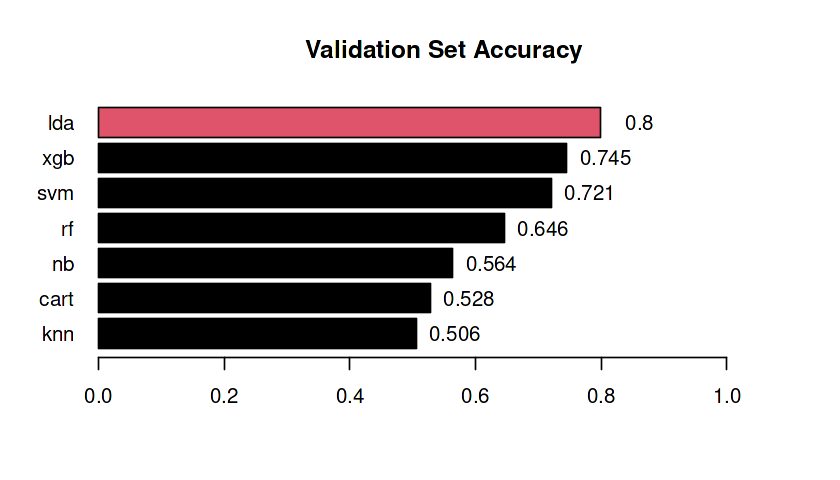

In [27]:
mdls <- list(cart = fit_tree, lda = fit_lda, 
             knn = fit_knn, 
             nb = fit_nb, rf = fit_rf, 
             xgb = fit_xgb, svm = fit_svm)

## Determine the correctness of test set predictions without PCA
preds <- sapply(mdls, predict, X_valid) 
correct <- preds == yvalid

## Compute accuracy
Accuracy <- colMeans(correct) |> sort() 

## Visualize the performance
options(repr.plot.width = 7)
pos <- barplot(Accuracy, col = (Accuracy == max(Accuracy)) + 1,
               horiz = TRUE, las = 1, xlim = c(0, 1.1),
               main = "Validation Set Accuracy")

text(Accuracy + strwidth("__0.000"), pos, round(Accuracy, 3))

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
    
Rather deceivingly, when we use cross-validation to fit the models, the accuracy is extremely high (around 0.95 in some cases). Since we do not group the same faces together before creating the cross-validation folds, the model might 'recognise' the same face in other folds. The validation set accuracy is a better estimate of model performance, since faces were grouped before splitting the training and validation sets. However, this still overestimates test error rate as we only used 80% of the data to train the model.

Overall, the more flexible models perform better, such as SVM and Boosted Trees. Less flexible models, such as CART and Naive Bayes, have considerably lower accuracy on the validation set. Interestingly, LDA performs better than the flexible models, which could be because our data fits the assumptions of LDA (shared covariance across classes, Gaussian class distribution, and linear distribution boundaries).

Given that the **accuracy** of the model is of interest to us, we select the model using **LDA**. </div>

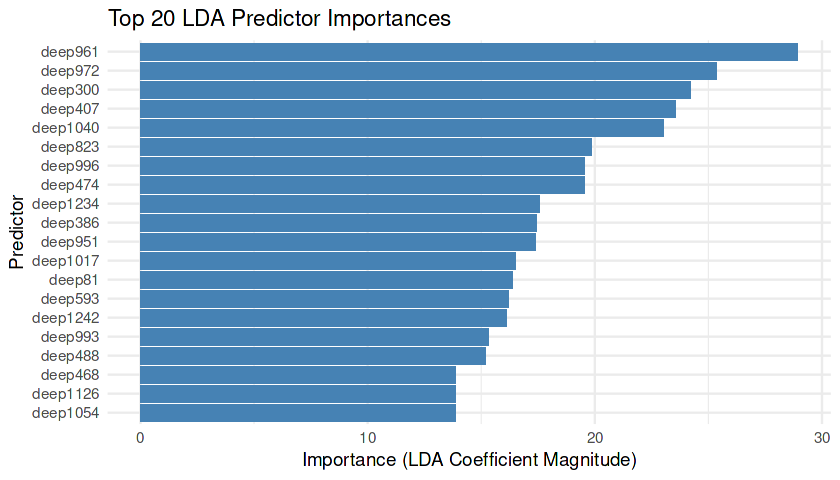

In [28]:
# We were unsure how to check which variables were most important in the LDA
## ==> LLM START (using free version of chatgpt, so there is no link with the prompt)
library(ggplot2)

# 1. Extract the LDA coefficients (scaling)
lda_scaling <- fit_lda$finalModel$scaling  # A matrix with predictors as rows

# 2. Convert to a data frame
scaling_df <- as.data.frame(lda_scaling)
scaling_df$Variable <- rownames(scaling_df)

# 3. For multi-class LDA, get overall magnitude (e.g., L2 norm or first LD)
# Use L2 norm across all LDs (if multiple)
scaling_df$Importance <- apply(scaling_df[, 1:ncol(lda_scaling)], 1, function(x) sqrt(sum(x^2)))

# 4. Get top 20
top_scaling <- scaling_df[order(-scaling_df$Importance), ][1:20, ]
## ==> LLM END

ggplot(top_scaling, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Horizontal bars
  labs(title = "Top 20 LDA Predictor Importances",
       x = "Predictor",
       y = "Importance (LDA Coefficient Magnitude)") +
  theme_minimal()


<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
A benefit of LDA is that it is easily interpretable compared to more complex models. We checked the 20 most important predictors for LDA, and it seems the deep features dominate this. A potential reason for this is that the deep features, using DenseNet, are pre-trained on large datasets, making it easier to differentiate between facial expressions. Furthermore, they pick up on complex patterns that hand-crafted features might miss, which LDA uses to separate between groups. 
    
</div>

Confusion Matrix and Statistics

          Reference
Prediction anger disgust happy sad
   anger      73      39     0  10
   disgust    15     103     1  10
   happy       9       6   203   4
   sad         5       8     0  48

Overall Statistics
                                          
               Accuracy : 0.7996          
                 95% CI : (0.7631, 0.8328)
    No Information Rate : 0.382           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7184          
                                          
 Mcnemar's Test P-Value : 5.756e-05       

Statistics by Class:

                     Class: anger Class: disgust Class: happy Class: sad
Sensitivity                0.7157         0.6603       0.9951    0.66667
Specificity                0.8866         0.9312       0.9424    0.97186
Pos Pred Value             0.5984         0.7984       0.9144    0.78689
Neg Pred Value             0.9296         0.8691  

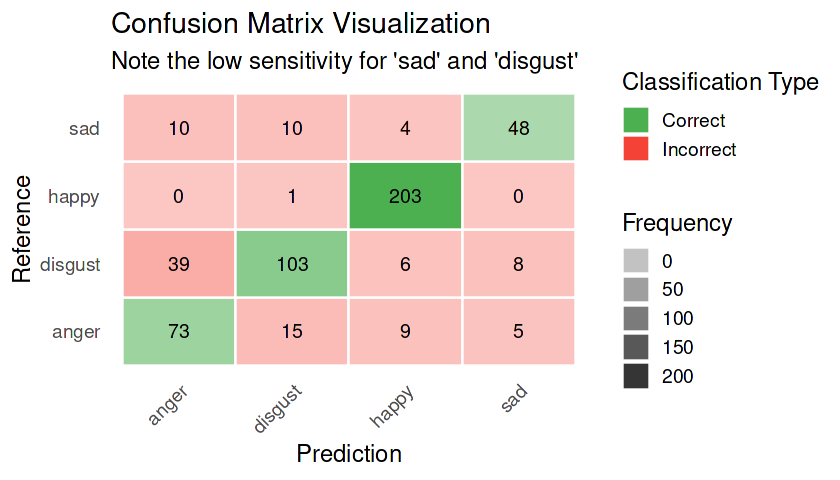

In [29]:
## Check performance on validation set for LDA (best performing model)
pred_lda <- predict(fit_lda, X_valid, type = 'raw') 
conf_m <- confusionMatrix(pred_lda, factor(yvalid))
conf_m

## Visualize confusion matrix for interpretability
conf_m_df <- as.data.frame(conf_m$table)
conf_m_df$Type <- ifelse(conf_m_df$Reference == conf_m_df$Prediction, "Correct", "Incorrect")

ggplot(conf_m_df, aes(x = Prediction, y = Reference, fill = Type)) +
    geom_tile(aes(alpha = Freq), color = "white", linewidth = 0.5) +
    geom_text(aes(label = Freq), color = "black", size = 4) +
    scale_fill_manual(values = c("Correct" = "#4CAF50",
                                 "Incorrect" = "#F44336")) +
    scale_alpha(range = c(0.3, 1)) +
    theme_minimal(base_size = 14) +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank()) +
    labs(title = "Confusion Matrix Visualization",
         subtitle = "Note the low sensitivity for 'sad' and 'disgust'",
         fill = "Classification Type",
         alpha = "Frequency")

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>
    
Our model almost perfectly identifies happy. This could be because the expression for happiness uses very different facial muscles to the other three, and there are more training samples for happy. The model often misclassifies or mistakes another emotion for 'sad'. A possible explanation is that the number of observations for sad is smaller than for the other emotion classes (see **'3. Data Exploration'**), hence the model might therefore simply be undertrained for this emotion. Ideally, we would access a dataset for which the number of observations for the different classes of emotions are more evenly distributed. It also seems to confuse anger and disgust quite often, as the expression of these emotions can be quite similar. Humans also perform poorly in classifying sad, anger and disgust compared to other emotions (see **'Introduction'**; Mollahosseini et al., 2017). </div>

In [30]:
## Apply every feature again to the full training set
# Edge features
edge_features_full <- t(apply(X, 1, get_edge_features))
edge_features_full <- as.data.frame(edge_features_full)

# Block and symmetry features
features_mat_full <- t(apply(X, 1, block_features))
features_df_full <- as.data.frame(features_mat_full)

colnames(features_df_full) <- c(
  as.vector(sapply(1:num_blocks, function(b) {
    paste0("block_", b, "_", block_feature_names)
  })),
  "symmetry"
)

# Deep features
deep_result_full <- deep_feat(X, densenet)

# Ensure that correct columns are kept
Z_full <- deep_result_full$Z_filtered
keep_deep_cols_full <- deep_result_full$keep_cols

# Combine into one data frame
X_full <- cbind(features_df_full,
                edge_features_full,
                Z_full
                )

In [31]:
## Fitting final model on all the available data
fit_lda_final <- train(X_full,
                       y, 
                       method = "lda",
                       preProcess = c("scale", "center"),
                       trControl = trCntrl)
fit_lda_final

Linear Discriminant Analysis 

2538 samples
 945 predictor
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: scaled (945), centered (945) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2030, 2031, 2031, 2030, 2030 
Resampling results:

  Accuracy   Kappa    
  0.9625736  0.9485381


<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   6. Submission
</h1

In [32]:
## Transform X_test
# Compute features for X_test on blocks and edges
features_mat_test <- t(apply(X_test, 1, block_features))
edge_features_test <- t(apply(X_test, 1, get_edge_features))

# Convert to a data frame
features_df_test <- as.data.frame(features_mat_test)
edge_features_test <- as.data.frame(edge_features_test)

# Give columns meaningful names
num_blocks <- (48 / 8)^2  # 36
block_feature_names <- c("mean", "std", 
                         "range", "entropy")

colnames(features_df_test) <- c(
  as.vector(sapply(1:num_blocks, function(b) {
    paste0("block_", b, "_", block_feature_names)
  })),
  "symmetry"
)

## For bag of features
Z_test_filtered <- deep_feat_test(X_test, keep_cols = keep_deep_cols_full)

# Combine
X_full_test <- cbind(features_df_test,
                     edge_features_test,
                     Z_test_filtered)

## Make predictions
pred_lda <- predict(fit_lda_final, X_full_test, type = 'raw')

## Write to file
tibble(file = rownames(X_full_test), category = pred_lda) |> 
    write_csv(file = "submission.csv")

## Check result
cat(readLines("submission.csv", n = 20), sep = "\n")

file,category
S010_004_00000017a.png,anger
S010_004_00000017b.png,anger
S010_004_00000017c.png,anger
S010_004_00000017d.png,anger
S010_004_00000017e.png,anger
S010_004_00000017f.png,anger
S011_002_00000022a.png,sad
S011_002_00000022b.png,sad
S011_002_00000022c.png,sad
S011_002_00000022d.png,sad
S011_002_00000022e.png,sad
S011_002_00000022f.png,sad
S011_005_00000018a.png,disgust
S011_005_00000018b.png,disgust
S011_005_00000018c.png,disgust
S011_005_00000018d.png,disgust
S011_005_00000018e.png,disgust
S011_005_00000018f.png,disgust
S011_006_00000013a.png,happy


<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   Divison of Labour
</h1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

* **Laura**: Division of image into blocks. Computing features for blocks. Visualization for data exploration. Code cleaning & writing markdowns.
* **Aada**: Computing edge features and trying out alternative image features on raw data. Code cleaning & writing markdowns.
* **Oliver**: Creating deep features approach. Building models and comparing them with a visualisation. Code cleaning & writing markdowns.
</div>

<h1 id = setup style = 'font-size:30px; background: linear-gradient(90deg, #5F9EA0, #7AC5CD, #8EE5EE); color: white; padding: 10px;  border-radius: 10px;'>
   References
</h1

<div style="background-color:#D2EFF1;
            color:#333333;
            padding:12px 16px;
            border-radius:10px;
            margin:10px 0;">
   </b>

    
Dopson, W., Beckwith, B., Tucker, D., & Bullard-Bates, P. (1984). Asymmetry of facial expression in spontaneous emotion. *Cortex, 20*(2), 243–251. https://doi.org/10.1016/S0010-9452(84)80041-6

Mollahosseini, A., Hasani, B., & Mahoor, M. H. (2017). AffectNet: A database for facial expression, valence, and arousal computing in the wild. *IEEE Transactions on Affective Computing, 10*(1), 18–31. https://doi.org/10.1109/TAFFC.2017.2740923

Lucey, P., Cohn, J. F., Kanade, T., Saragih, J., Ambadar, Z., & Matthews, I. (2010). The extended Cohn–Kanade dataset (CK+): A complete dataset for action unit and emotion-specified expression. In *2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition - Workshops* (pp. 94–101). IEEE. https://doi.org/10.1109/CVPRW.2010.5543262

Rehman, A., Mujahid, M., Elyassih, A., Alghofaily, B., & Bahaj, S. A. O. (2025). Comprehensive review and analysis on facial emotion recognition: Performance insights into deep and traditional learning with current updates and challenges. *Computers, Materials & Continua, 82*(1). https://doi.org/10.32604/cmc.2024.058036

Lander, K., & Bindemann, M. (2021). Why are some people better at recognising faces than others? *Frontiers for Young Minds*. https://doi.org/10.3389/frym.2021.597541
</div>